<a href="https://colab.research.google.com/github/enakai00/colab_rlbook/blob/master/Chapter02/04_Policy_Evaluation_4_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[PE4-01]**

Import modules.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.size'] = 12

**[PE4-02]**

Define the Gridworld class.

In [0]:
class Gridworld:
  def __init__(self, size=8, goals=[7], penalty=0):
    self.size = size
    self.goals = goals
    self.penalty = penalty

    self.states = range(size)
    self.actions = [-1, 1]
    self.policy = {}
    self.value = {}
    for s in self.states:
      self.value[s] = 0
   
  def move(self, s, a):
    if s in self.goals:
      return 0, s   # Reward, Next state
    
    s_new = s + a

    if s_new not in self.states:
      return self.penalty, s  # Reward, Next state
    
    if s_new in self.goals:
      return 1, s_new   # Reward, Next state
    
    return self.penalty, s_new  # Reward, Next state

**[PE4-03]**

Define a function to show state values.

In [0]:
  def show_values(world, subplot=None, title=None):
    if not subplot:
      fig = plt.figure(figsize=(world.size*0.8, 1.7))
      subplot = fig.add_subplot(1, 1, 1)

    result = np.zeros([1, world.size])
    for s in world.states:
      result[0][s]  = world.value[s]
    sns.heatmap(result, square=True, cbar=False, yticklabels=[],
                annot=True, fmt='3.1f', cmap='coolwarm',
                ax=subplot).set_title(title)

**[PE1-04]**

Define a function to apply the policy evaluation algorithm.

In [0]:
def policy_eval(world, gamma=1.0, trace=False):
  if trace:
    fig = plt.figure(figsize=(world.size*0.8, len(world.states)*1.7))

  for s in world.states:
    v_new = 0
    for a in world.actions:
      r, s_new = world.move(s, a)
      v_new += world.policy[(s, a)] * (r + gamma * world.value[s_new])
    world.value[s] = v_new

    if trace:
      subplot = fig.add_subplot(world.size, 1, s+1)
      show_values(world, subplot, title='Update on s={}'.format(s))

**[PE4-05]**

Create a gridworld instance and define a policy to keep moving left.

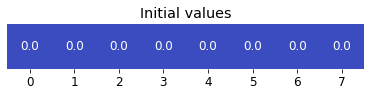

In [5]:
world = Gridworld(size=8, goals=[0])
for s in world.states:
  world.policy[(s, 1)] = 0
  world.policy[(s, -1)] = 1

show_values(world, title='Initial values')

**[PE4-06]**

Apply the policy evaluation algorithm for a single iteration.

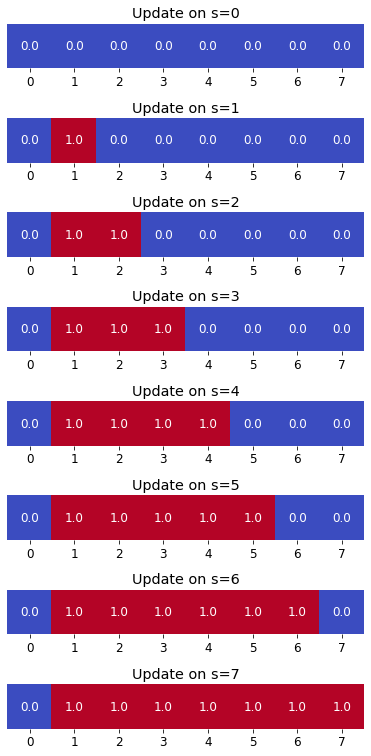

In [6]:
policy_eval(world, trace=True)

**[PE4-07]**

Create a gridworld instance with final states at both ends, and define a policy to move randomly.

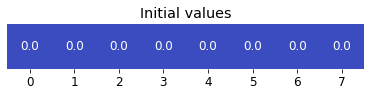

In [7]:
world = Gridworld(size=8, goals=[0, 7])
for s in world.states:
  world.policy[(s, 1)] = 1/2
  world.policy[(s, -1)] = 1/2

show_values(world, title='Initial values')

**[PE4-08]**

Apply the policy evaluation algorithm for three iterations.

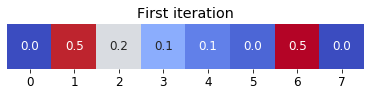

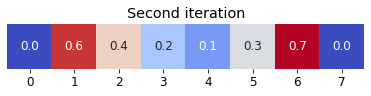

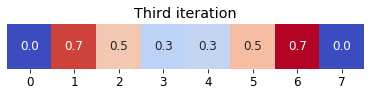

In [8]:
policy_eval(world)
show_values(world, title='First iteration')

policy_eval(world)
show_values(world, title='Second iteration')

policy_eval(world)
show_values(world, title='Third iteration')

**[PE4-09]**

Apply the policy evaluation algorithm until the conversion.

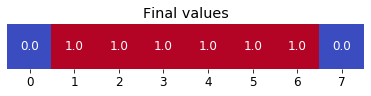

In [9]:
for _ in range(100):
  policy_eval(world)

show_values(world, title='Final values')